# Predicting Liver Patients using Logistic Regression

**Business context.** In an effort to reduce burden on doctors, the government has hired you as a data scientist to build a predictive machine learning that would give an indication whether a person would have liver problem or not.

**Problem statement.** You want to identify <i>"Patients with liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs."</i>

**Analytical context** Your goal is to build a logistic machine learning model that predicts whether a patient is healthy (non liver patient) or ill (liver patient) based on some clinical and demographic features (or input variables) listed in the 'Data Description' section.

## Importing the packages for data analysis

We will use three main packages: ```pandas```,``` numpy```,```matplotlib``` and `scipy` library. Let's import these packages using the keyword ``import``. We will change the name from ``pandas`` to ```pd```,```numpy``` to ```np```,```matplotlib.pyplot``` to ```plt```, ```seaborn``` to ```sns```, using the keyword ``as``. From ``scipy`` we will import the ``train_test_split`` package that allows us to split data into train and test data. We will import the function ``LinierRegression`` which allows us to make model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

# File system manangement
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

This data set contains liver patient records and non liver patient records collected from North East of Andhra Pradesh, India. The "Liver_Problem" column is the target variable used to divide groups into liver patient ( Liver_Problem == 1) or not ( Liver_Problem == 2).

Liver_Problem == 1, implies the individual is a liver patient
Liver_Problem == 2, implies the individual is not a liver patient

Data Description:

1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio
11. "Liver_Problem" column is the target variable used to divide groups into liver patient (liver disease) or not (no disease).

To get a better idea of the data available, let's first take a look at the Indian Liver Patient data. `Pandas` allows you to easily read CSV files by using the `pd.read_csv()` method:

In [2]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/liver_patient_new_quiz_2_3.csv')

Using `df.head()` and `df.tail()` functions we can review the top and bottom samples. Unless otherwise specified, `DataFrame` and `Series` objects have indices starting from 0 and incrementing monotonically as integers:

In [3]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
495,32,Male,0.7,0.2,165,31,29,6.1,3.0,0.96,0
496,24,Male,1.0,0.2,189,52,31,8.0,4.8,1.50,1
497,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70,1
498,68,Male,1.8,0.5,151,18,22,6.5,4.0,1.60,1
499,55,Male,3.6,1.6,349,40,70,7.2,2.9,0.60,1


It may be noted that there are 500 records, each containing 11 column values. The DataFrame's size can be obtained by using the `shape` attribute:

In [5]:
liver_data.shape

(500, 11)

The ```liver_data``` columns are:

In [6]:
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Problem'],
      dtype='object')

In [7]:
liver_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Liver_Problem                   int64
dtype: object

## Data preparation process: *Data Wrangling*

### Checking missing value

In [8]:
((liver_data.isnull().sum()/len(liver_data))*100).sort_values(ascending=False)

Albumin_and_Globulin_Ratio    0.8
Liver_Problem                 0.0
Albumin                       0.0
Total_Protiens                0.0
Aspartate_Aminotransferase    0.0
Alamine_Aminotransferase      0.0
Alkaline_Phosphotase          0.0
Direct_Bilirubin              0.0
Total_Bilirubin               0.0
Gender                        0.0
Age                           0.0
dtype: float64

Let's graph the distribution of missing values in the dataset using the `missngno` library:

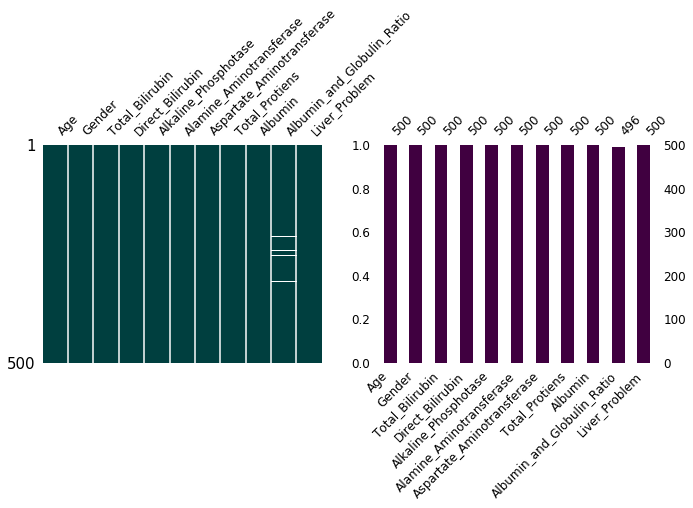

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(liver_data, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(liver_data, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

**Input null values**

In [10]:
liver_data[pd.isnull(liver_data).any(axis=1)].head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [11]:
liver_data["Albumin_and_Globulin_Ratio"] = liver_data["Albumin_and_Globulin_Ratio"].fillna(liver_data["Albumin_and_Globulin_Ratio"].median())

In [12]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Problem                 0
dtype: int64

### Checking duplicate value

In [13]:
liver_data.duplicated().sum()

13

In [14]:
liver_data[liver_data.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


**Delete Duplicate Values**

In [15]:
liver_data = liver_data.drop(liver_data[liver_data.duplicated()].index)

In [16]:
liver_data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [17]:
# Basic Statistical details 
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Histogram of the complete dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b68d3d0>,
      dtype=object)

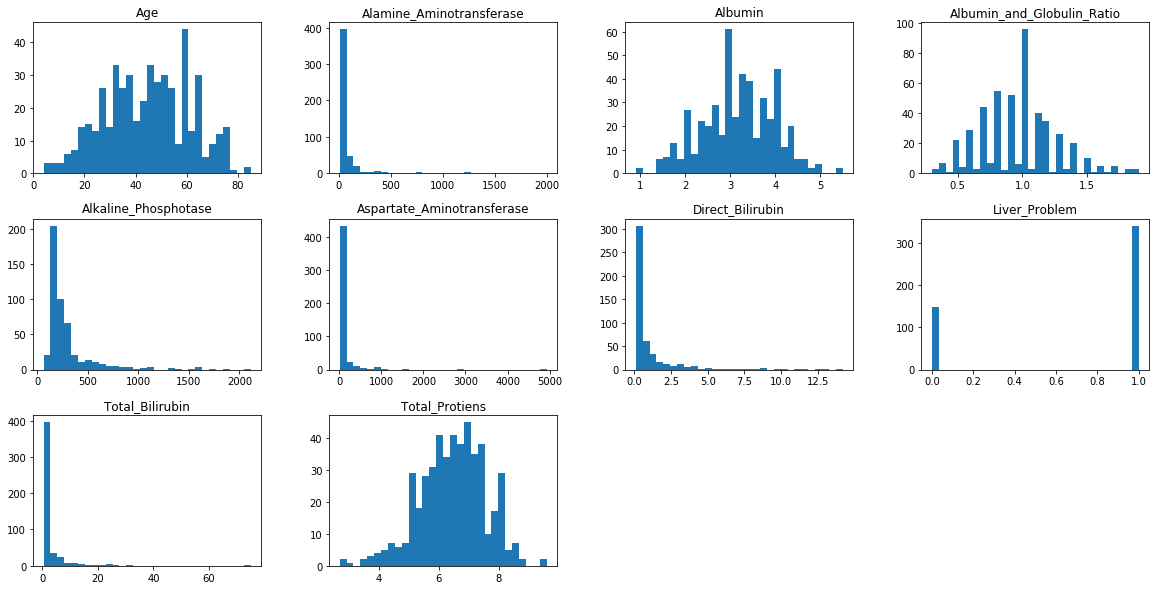

In [18]:
liver_data.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)

### Total count by sex

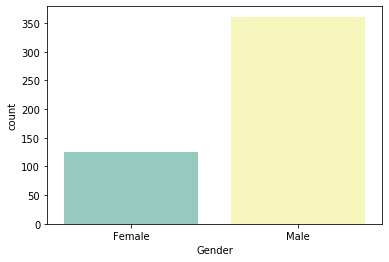

In [19]:
sns.countplot(x = 'Gender', data = liver_data, palette="Set3")

### Visualize all interactions between the terms

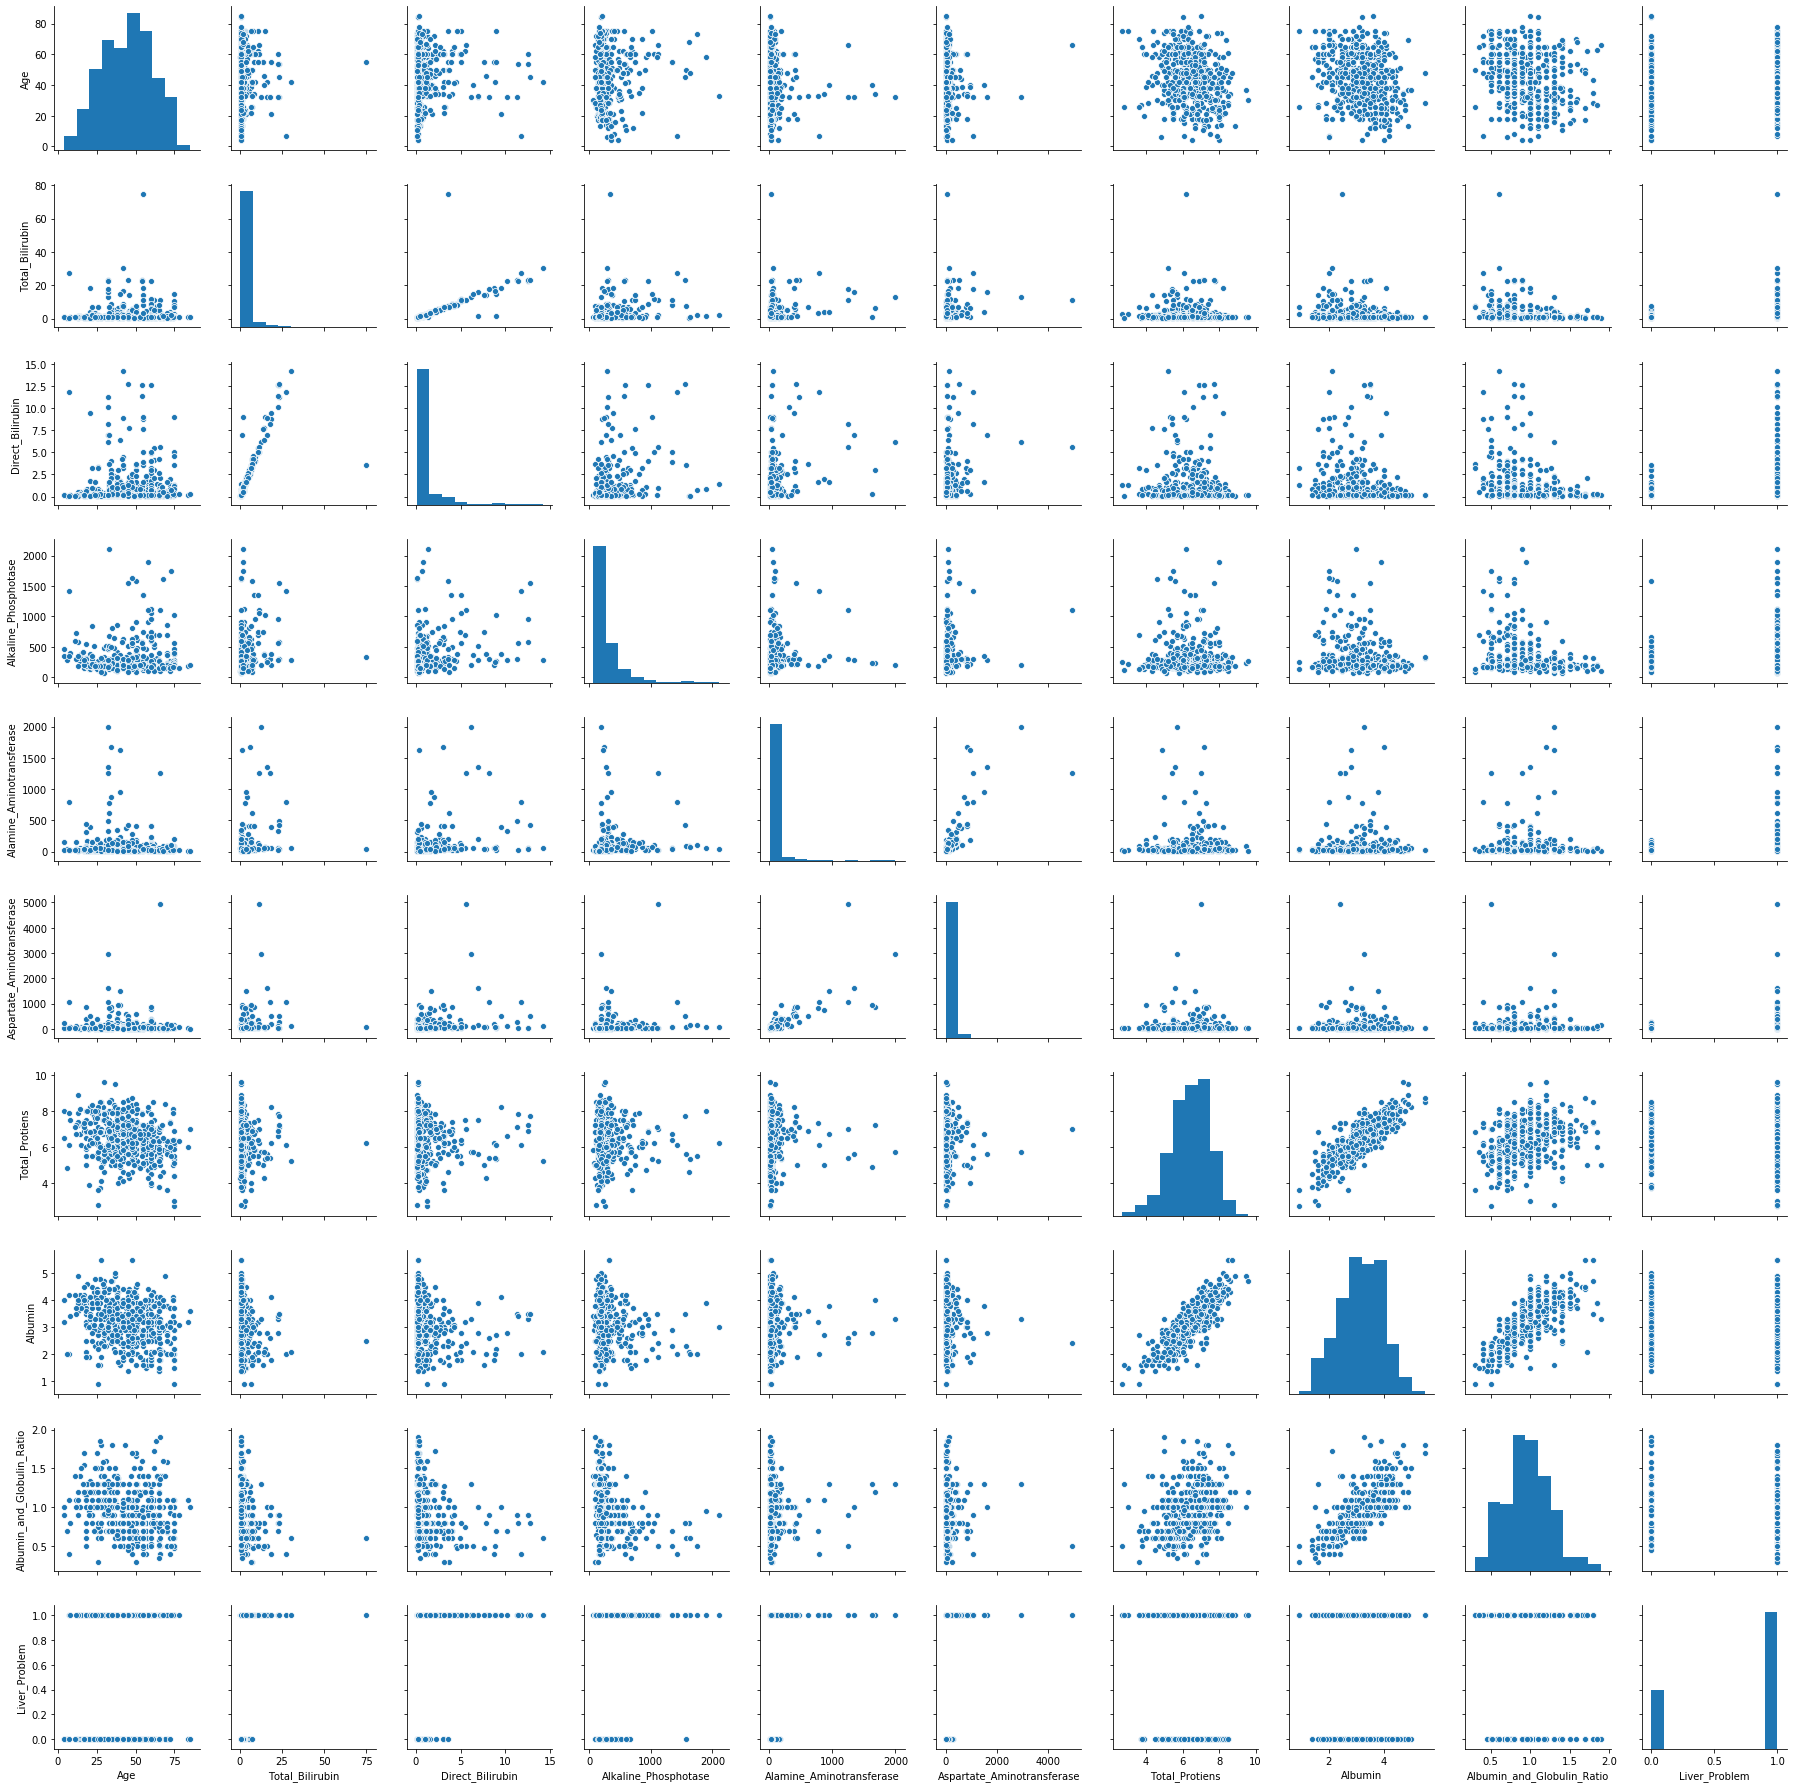

In [20]:
sns.pairplot(liver_data)

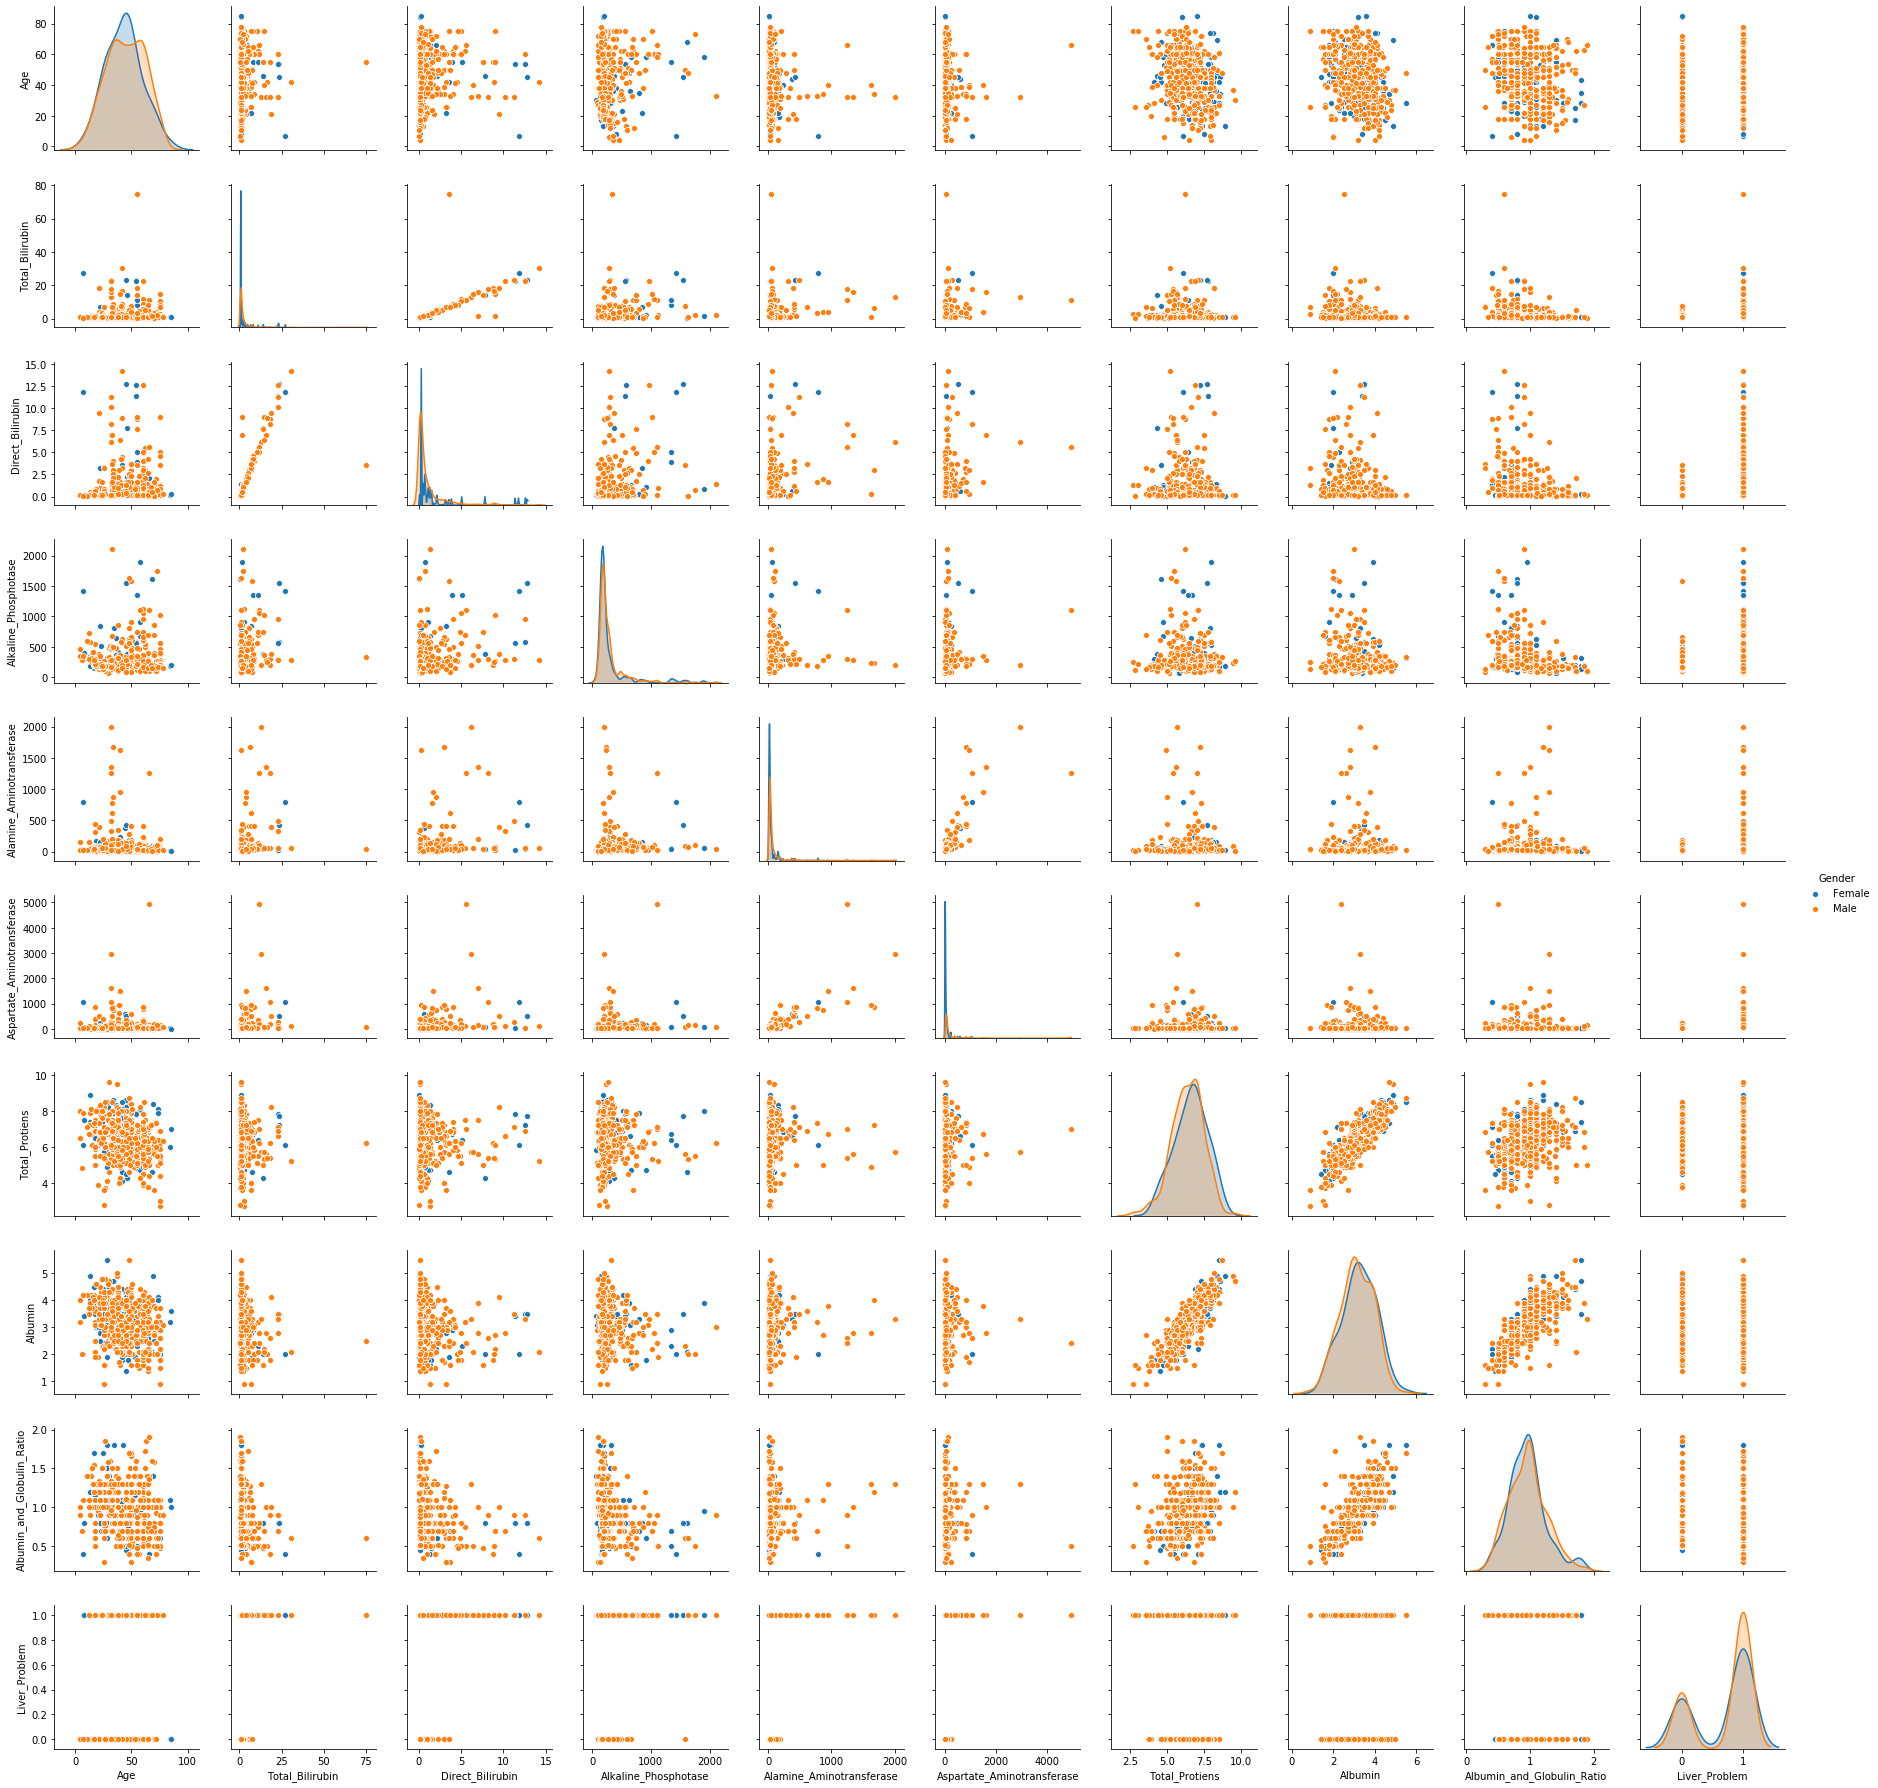

In [21]:
sns.pairplot(liver_data,hue='Gender')

In [22]:
# Description of the basic statistics of the dataset
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,44.702259,2.612115,1.120739,297.901437,81.636550,108.170431,6.459138,3.177823,0.962690,0.698152
std,16.603574,5.173508,2.084304,260.401270,193.421163,309.720307,1.092960,0.801054,0.292378,0.459532
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.500000,0.800000,0.200000,175.000000,23.000000,24.000000,5.700000,2.600000,0.800000,0.000000
50%,45.000000,0.900000,0.300000,205.000000,33.000000,40.000000,6.500000,3.200000,1.000000,1.000000
75%,58.000000,2.150000,1.000000,298.000000,59.000000,78.000000,7.200000,3.800000,1.100000,1.000000
max,85.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.900000,1.000000


## Hot encoding

In [18]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Gender"]:
    liver_data = create_dummies(liver_data,column)

In [19]:
liver_data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


## Splitting data to train and test split

In [20]:
X = liver_data.drop(['Liver_Problem','Gender'], axis=1)
y = liver_data['Liver_Problem']

In [21]:
X.shape

(487, 11)

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

## Model Building

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.40      0.37        30
           1       0.71      0.66      0.69        68

    accuracy                           0.58        98
   macro avg       0.53      0.53      0.53        98
weighted avg       0.60      0.58      0.59        98



In [26]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.6870229007633588


### Model buiding 2

In [27]:
# We will be further discussing about why Random Forest is in ensemble module of sklearn library
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_2 = RandomForestClassifier(n_estimators = 100)

In [29]:
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = model_2.predict(X_test)

In [31]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.7445255474452556


### Model buiding 3

In [32]:
from sklearn.linear_model import LogisticRegression
model_3=LogisticRegression()
model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)

In [33]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8333333333333333


### Using cross validation for more robust error measurement

In [34]:
scores = cross_val_score(model_3, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.63265306 0.65306122 0.67346939 0.6875     0.6875     0.70833333
 0.71428571 0.71428571 0.73469388 0.75510204]
0.6960884353741496


## Making Predictions on Test data

In [51]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [52]:
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [55]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Gender"]:
    test_new = create_dummies(test_new,column)

In [56]:
test_new.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7,0,1
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2,0,1
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4,0,1
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9,0,1
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1,0,1


In [57]:
test_new = test_new.drop(['Gender'],axis=1)

In [58]:
test_new.shape

(82, 11)

### Prediction on new Test Data

In [59]:
liver_predict = model_3.predict(test_new)

In [62]:
res = pd.DataFrame(liver_predict)
res.index = test_new.index # its important for comparison
res.columns = ["Liver_Problem"]
res.to_csv("prediction_results_HP.csv")      # the csv file will be saved locally on the same location where this notebook is located.